In [4]:
import simulacion as s
import numpy as np
import ROOT as root
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.30/04


**Grafica 1: Histogramas sanos y defectuosos**
Grafica con 3 histogramas sanos (10,20,40) nct y 3 defectuosos (t=2,k=2)

In [210]:
histogramas_sanos =[]
histogramas_defecto=[]

In [211]:
C_med = 8929
nct = 20

N_pix = 64
num_cuentas = 10000


dist = s.dist(N_pix,C_med,num_cuentas,3,11)
name = s.histogram_name(N_pix,nct,1)
hist = root.TH1D(name,'',400,0.,10.)
for i in range(len(dist)):
    hist.Fill(dist[i])
hist.Scale(1/hist.Integral())
sigma=s.incertidumbre(hist,num_cuentas)
for i,error in enumerate(sigma,start=1):
    hist.SetBinError(i,error)
histogramas_sanos.append(hist)

        
     
        
       

Warning in <TROOT::Append>: Replacing existing TH1: 064-20-f1-0-0.root (Potential memory leak).


In [138]:
N_pix = 64
C_med = 8929
num_cuentas = 10000
nct_list=[20]
sizes = [1,5]
contrasts = [4,8]
for nct in nct_list:
    for t in sizes:
        for k in contrasts:
            dist = s.dist_defectos(t,k,N_pix,C_med,num_cuentas,3,11)
            name=s.histogram_name(N_pix,nct,1,t,k)
            hist=root.TH1D(name,'',400,0.,10.)
            for i in range(len(dist)):
                hist.Fill(dist[i])
            hist.Scale(1/hist.Integral())
            sigma=s.incertidumbre(hist,num_cuentas)
            for i,error in enumerate(sigma,start=1):
                hist.SetBinError(i,error)
            histogramas_defecto.append(hist)

In [212]:
len(histogramas_sanos)
len(histogramas_defecto)

4

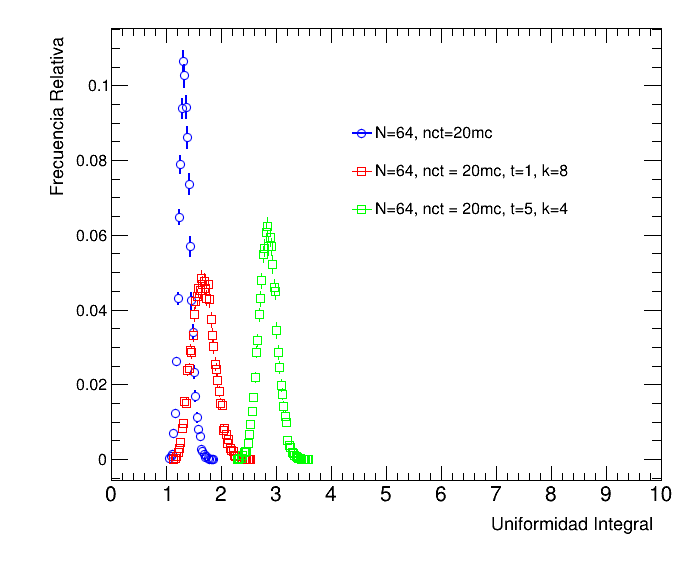

In [235]:
hsano = histogramas_sanos[0]
root.gROOT.SetStyle("ATLAS")
root.gROOT.ForceStyle()
canvas = root.TCanvas('','',700,600)
 
hsano.SetLineColor(root.kBlue)
hsano.SetMarkerStyle(24)
hsano.SetMarkerColor(root.kBlue)
hsano.SetTitle("Histogramas 20 millones de cuentas totales - 64 x 64 pix.")
hsano.GetXaxis().SetTitle("Uniformidad Integral")
hsano.GetYaxis().SetTitle("Frecuencia Relativa")
hsano.GetXaxis().SetTitleSize(0.035)  # Adjust as needed
hsano.GetYaxis().SetTitleSize(0.035)  # Adjust as needed
hsano.SetStats(0)
hsano.Draw()




histogramas_defecto[1].SetLineColor(root.kRed)
histogramas_defecto[1].SetMarkerStyle(25)
histogramas_defecto[1].SetMarkerColor(root.kRed)
histogramas_defecto[2].SetLineColor(root.kGreen)
histogramas_defecto[2].SetMarkerStyle(25)
histogramas_defecto[2].SetMarkerColor(root.kGreen)



histogramas_defecto[1].Draw("SAME")
histogramas_defecto[2].Draw("SAME")


legend = root.TLegend(0.5,0.6,0.9,0.8)
legend.SetEntrySeparation(0.05)
legend.SetBorderSize(0)
legend.SetMargin(0.1)
legend.AddEntry(hsano,"N=64, nct=20mc")
legend.AddEntry(histogramas_defecto[1],"N=64, nct = 20mc, t=1, k=8")
legend.AddEntry(histogramas_defecto[2],"N=64, nct = 20mc, t=5, k=4")
legend.SetTextFont(42)  # 42 is the font code for LaTeX-compatible fonts
legend.SetTextSize(0.03)  # Adjust the font size as needed
legend.Draw()



canvas.Draw()

In [1]:
graphs = []

In [23]:
Npix = 64
nct = 80
t = 2
k = 2

x,y,xe,ye = s.curvaroc(Npix,nct,t,k,False)
roc = root.TGraphErrors(400)
for i in range(400):
    roc.SetPoint(i,x[i],y[i])
    roc.SetPointError(i,xe[i],ye[i])
roc.SetTitle("Receiver Operating Characteristic (ROC)")
roc.GetXaxis().SetTitle("False Positive Rate")
roc.GetYaxis().SetTitle("True Positive Rate")
canvas = root.TCanvas('','',800,600)   
roc.SetMarkerColor(root.kOrange+7)
roc.SetLineColor(root.kOrange+7)
roc.SetMarkerStyle(24)


graphs.append(roc)

In [73]:
legend = root.TLegend(0.6,0.25,0.9,0.55)
legend.SetEntrySeparation(0.05)
legend.SetBorderSize(0)
legend.SetMargin(0.1)
legend.AddEntry(graphs[0],"N=64, nct=5, t=2, t=2")
legend.AddEntry(graphs[1],"N=64, nct=10, t=2, t=2")
legend.AddEntry(graphs[2],"N=64, nct=20, t=2, t=2")
legend.AddEntry(graphs[3],"N=64, nct=40, t=2, t=2")
legend.AddEntry(graphs[4],"N=64, nct=80, t=2, t=2")
legend.SetTextFont(42)  # 42 is the font code for LaTeX-compatible fonts
legend.SetTextSize(0.03)  # Adjust the font size as needed

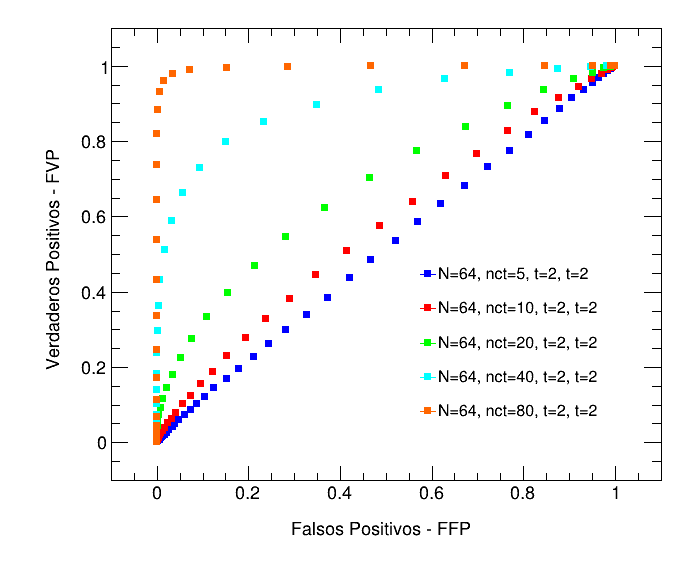

In [100]:
root.gROOT.SetStyle("ATLAS")
root.gROOT.ForceStyle()
canvas = root.TCanvas('','',700,600)

graphs[0].SetTitle("Receiver Operating Characteristic (ROC)")
graphs[0].GetXaxis().SetTitle("Falsos Positivos - FFP")
graphs[0].GetYaxis().SetTitle("Verdaderos Positivos - FVP")
graphs[0].GetXaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetYaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetXaxis().CenterTitle()
graphs[0].GetYaxis().CenterTitle()
graphs[0].GetXaxis().SetTitleOffset(1.5) 
graphs[0].GetYaxis().SetTitleOffset(1.5) 

for i in range(len(graphs)):
    graphs[i].SetMarkerStyle(21)
    graphs[i].SetMarkerSize(0.9)

graphs[0].Draw("APX")
graphs[1].Draw("PX SAME")
graphs[2].Draw("PX SAME")
graphs[3].Draw("PX SAME")
graphs[4].Draw("PX SAME")

legend.Draw()
canvas.Draw()   

In [5]:
graphs = []
ajustes = []

In [11]:
x,y,xe,ye = s.curvaroc(64,5,2,1)
s.montecarlo_trapecio(x,y,xe,ye)

(0.49209673000000004, 0.001146124892740475)

In [6]:
Npix = 64
nct = 20
t_list = [1,2,3,4,5]
color_list = [root.kBlue,root.kRed,root.kGreen,root.kCyan,root.kOrange+7]
for t,color in zip(t_list,color_list):
    x,y,xe,ye = s.areacontraste(Npix,nct,t)
    ac = root.TGraphErrors(20)
    for i in range(20):
        ac.SetPoint(i,x[i],y[i])
        ac.SetPointError(i,xe[i],ye[i])
    a,b = s.ajuste_ac(x,y)
    ajuste = root.TGraph(10000)
    x_fit = np.zeros(10000)
    y_fit = np.zeros(10000)
    for i in range(10000):
        x_fit[i] = i*10/10000
        y_fit[i] = 0.5*(1+1/(1+np.exp(a+b*x_fit[i])))
        ajuste.SetPoint(i,x_fit[i],y_fit[i])
    ajuste.SetLineColor(color-1)
    ac.SetTitle("Curvas Area-Contraste")
    ac.GetXaxis().SetTitle("Contaste del defecto - k")
    ac.GetYaxis().SetTitle("AUC")
    canvas = root.TCanvas('','',800,600)   
    ac.SetMarkerColor(color)
    ac.SetLineColor(color)
    ac.SetMarkerStyle(24)
    ajustes.append(ajuste)
    graphs.append(ac)


****************************************
Minimizer is Linear / Migrad
Chi2                      =      0.13479
NDf                       =           12
p0                        =      6.18163   +/-   0.0922873   
p1                        =     -1.01036   +/-   0.0140533   
****************************************
Minimizer is Linear / Migrad
Chi2                      =    0.0782356
NDf                       =            4
p0                        =      5.70566   +/-   0.160911    
p1                        =     -2.51727   +/-   0.0668626   
****************************************
Minimizer is Linear / Migrad
Chi2                      =   0.00125404
NDf                       =            1
p0                        =      5.35047   +/-   0.0778536   
p1                        =     -3.72163   +/-   0.0500807   
****************************************
Minimizer is Linear / Migrad
Chi2                      =    0.0468549
NDf                       =            2
p0                  

In [11]:
legend = root.TLegend(0.65,0.25,0.95,0.55)
legend.SetEntrySeparation(0.05)
legend.SetBorderSize(0)
legend.SetMargin(0.1)
legend.AddEntry(graphs[0],"N=64, nct=20, t=1")
legend.AddEntry(graphs[1],"N=64, nct=20, t=2")
legend.AddEntry(graphs[2],"N=64, nct=20, t=3")
legend.AddEntry(graphs[3],"N=64, nct=20, t=4")
legend.AddEntry(graphs[4],"N=64, nct=20, t=5")
legend.SetTextFont(42)  # 42 is the font code for LaTeX-compatible fonts
legend.SetTextSize(0.03)  # Adjust the font size as needed

In [ ]:


s.ajuste_ac()

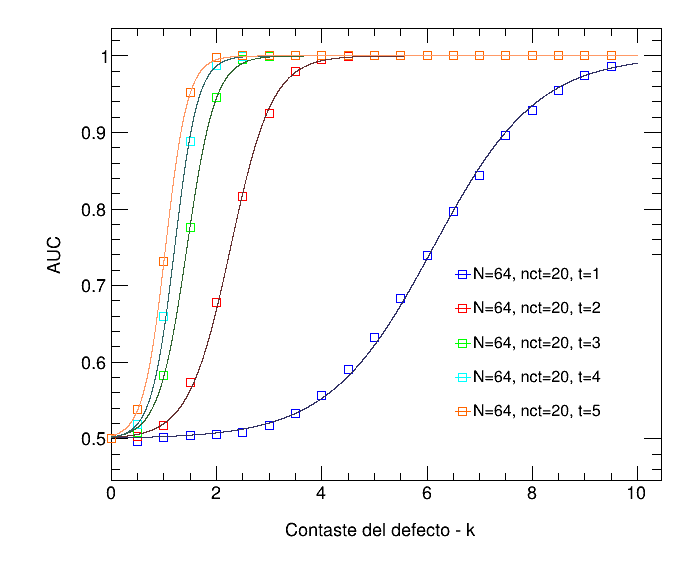

In [12]:
root.gROOT.SetStyle("ATLAS")
root.gROOT.ForceStyle()
canvas = root.TCanvas('','',700,600)

graphs[0].SetTitle("Curvas Area-Contraste")
graphs[0].GetXaxis().SetTitle("Contaste del defecto - k")
graphs[0].GetYaxis().SetTitle("AUC")
graphs[0].GetXaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetYaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetXaxis().CenterTitle()
graphs[0].GetYaxis().CenterTitle()
graphs[0].GetXaxis().SetTitleOffset(1.5) 
graphs[0].GetYaxis().SetTitleOffset(1.5) 

for i in range(len(graphs)):
    graphs[i].SetMarkerStyle(25)
    graphs[i].SetMarkerSize(1)

graphs[0].Draw("APX")
graphs[1].Draw("PX SAME")
graphs[2].Draw("PX SAME")
graphs[3].Draw("PX SAME")
graphs[4].Draw("PX SAME")
ajustes[0].Draw("SAME")
ajustes[1].Draw("SAME")
ajustes[2].Draw("SAME")
ajustes[3].Draw("SAME")
ajustes[4].Draw("SAME")

legend.Draw()
canvas.Draw() 
